In [9]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.linear_model import LinearRegression

In [10]:
suptitle_size = 20
title_size = 15
label_size = 14
number_of_years = 2023 - 1940
number_of_months = number_of_years * 12

### Zagreb data

In [11]:
file = nc.Dataset('zg_temp_00.nc', 'r')
zg_temp_00 = file.variables["t"][:].data - 273.15
levels = file.variables["level"][:].data
file.close()

file = nc.Dataset('zg_temp_12.nc', 'r')
zg_temp_12 = file.variables["t"][:].data - 273.15
file.close()

file = nc.Dataset('zg_rel_00.nc', 'r')
zg_rel_00 = file.variables["r"][:].data
file.close()

file = nc.Dataset('zg_rel_12.nc', 'r')
zg_rel_12 = file.variables["r"][:].data
file.close()

file = nc.Dataset('zg_spec_00.nc', 'r')
zg_spec_00 = file.variables["q"][:].data * 1000
file.close()

file = nc.Dataset('zg_spec_12.nc', 'r')
zg_spec_12 = file.variables["q"][:].data * 1000
file.close()

### Zadar data

In [12]:
file = nc.Dataset('zd_temp_00.nc', 'r')
zd_temp_00 = file.variables["t"][:].data - 273.15
file.close()

file = nc.Dataset('zd_temp_12.nc', 'r')
zd_temp_12 = file.variables["t"][:].data - 273.15
file.close()

file = nc.Dataset('zd_rel_00.nc', 'r')
zd_rel_00 = file.variables["r"][:].data
file.close()

file = nc.Dataset('zd_rel_12.nc', 'r')
zd_rel_12 = file.variables["r"][:].data
file.close()

file = nc.Dataset('zd_spec_00.nc', 'r')
zd_spec_00 = file.variables["q"][:].data * 1000
file.close()

file = nc.Dataset('zd_spec_12.nc', 'r')
zd_spec_12 = file.variables["q"][:].data * 1000
file.close()

In [13]:
def get_averaged_differences(values):
    difference_slopes = []
    for level in range(len(levels)):
        
        averages_by_year = []
        sum = 0
        counter = 0

        for time_step in range(len(values)): 
            sum += values[time_step][level][0][0] 

            if (time_step < 12 and counter == 11 or time_step > 12 and counter == 12):
                averages_by_year.append(sum)
                sum = 0
                counter = 0
            counter += 1

        differences = []

        for year in range(len(averages_by_year) - 1):
            differences.append(averages_by_year[year + 1] - averages_by_year[year])
        
        difference_slopes.append(np.average(differences))
        
    return difference_slopes

In [14]:
def get_averaged_differences2(values):
    difference_slopes = []
    
    for level in range(len(levels)):
        
        averages_by_year = []
        sum = 0
        counter = 0

        for time_step in range(len(values)):
            sum += values[time_step][level][0][0]
            
            if (time_step < 12 and counter == 11 or time_step > 12 and counter == 12):
                averages_by_year.append(sum/12)
                sum = 0
                counter = 0
                
            counter += 1
            
        anomalies = []

        for year in range(len(averages_by_year)):
            anomalies.append(averages_by_year[year] - np.average(averages_by_year))
            
        years = np.arange(1940, 2023, 1).reshape(-1, 1)
        
        model = LinearRegression().fit(years, anomalies)
        difference_slopes.append(model.coef_)
        
    return difference_slopes

In [15]:
def graph_trend(temp, rel, spec, title):

    dashed_line_color = "#888"

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    fig.suptitle(title, fontsize=suptitle_size)

    ax[0].plot(get_averaged_differences(temp), levels)
    ax[0].invert_yaxis()
    ax[0].axvline(0, color=dashed_line_color, linestyle="dashed")
    ax[0].set_xlim(-1, 1)

    ax[1].plot(get_averaged_differences(rel), levels)
    ax[1].invert_yaxis()
    ax[1].axvline(0, color=dashed_line_color, linestyle="dashed")
    ax[1].set_xlim(-1, 1)


    ax[2].plot(get_averaged_differences(spec), levels)
    ax[2].invert_yaxis()
    ax[2].axvline(0, color=dashed_line_color, linestyle="dashed")

    ax[0].set_title("Temperatura", fontsize=title_size)
    ax[0].set_xlabel(r"Promjena [$^{\circ}$ C]", fontsize=label_size)
    ax[0].set_ylabel("Tlak [hPa]", fontsize=label_size)

    ax[1].set_title("Relativna vlažnost", fontsize=title_size)
    ax[1].set_xlabel(r"Promjena [$\%$]", fontsize=label_size)
    ax[1].set_ylabel("Tlak [hPa]", fontsize=label_size)

    ax[2].set_title("Specifična vlažnost", fontsize=title_size)
    ax[2].set_xlabel(r"Promjena [$g/kg$]", fontsize=label_size)
    ax[2].set_ylabel("Tlak [hPa]", fontsize=label_size)

## Zagreb 00 UTC

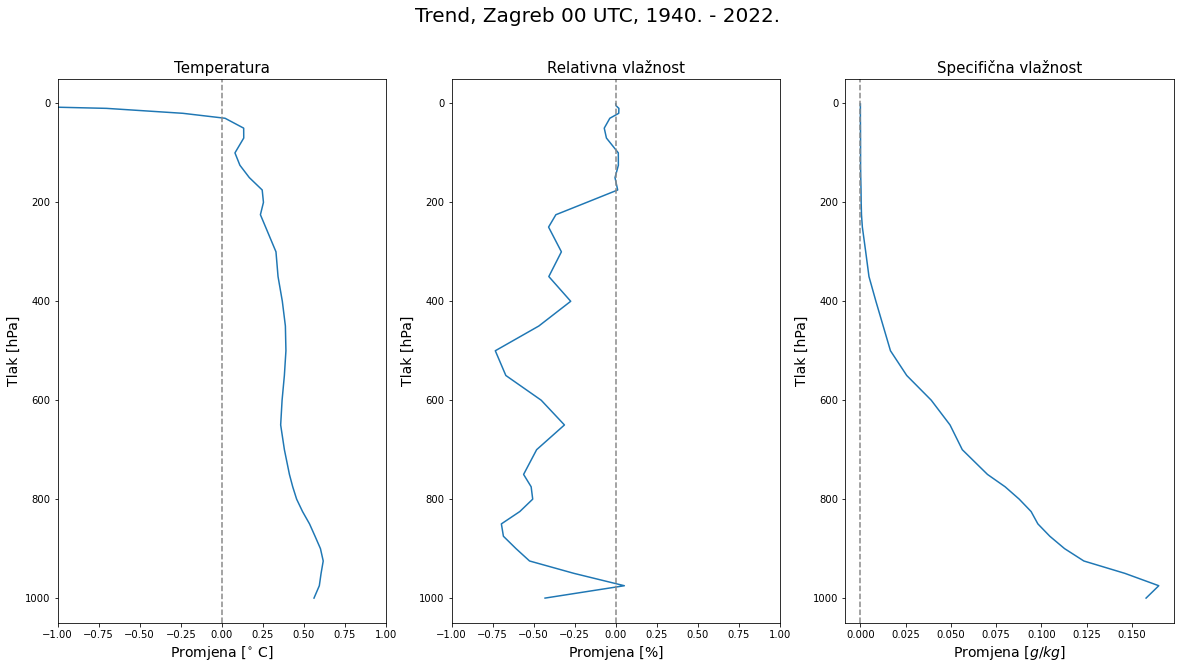

In [16]:
graph_trend(zg_temp_00, zg_rel_00, zg_spec_00, "Trend, Zagreb 00 UTC, 1940. - 2022.")

plt.savefig("zg_00.png")

## Zadar 00 UTC

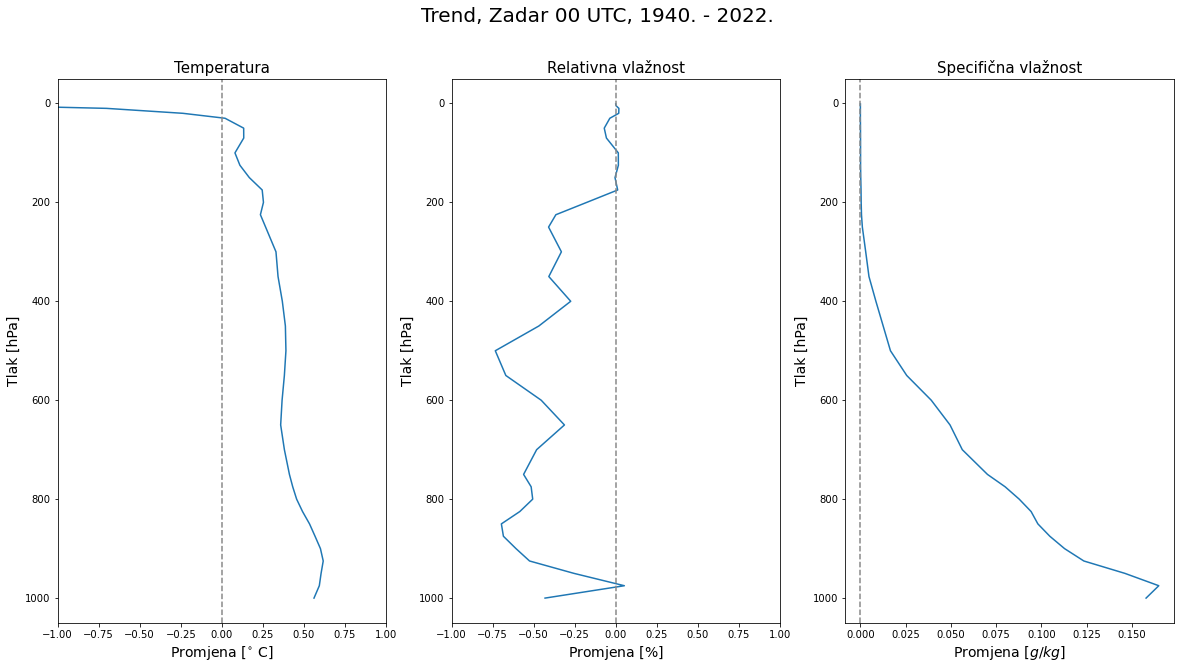

In [17]:
graph_trend(zg_temp_00, zg_rel_00, zg_spec_00, "Trend, Zadar 00 UTC, 1940. - 2022.")

plt.savefig("zd_00.png")

## Zagreb 12 UTC

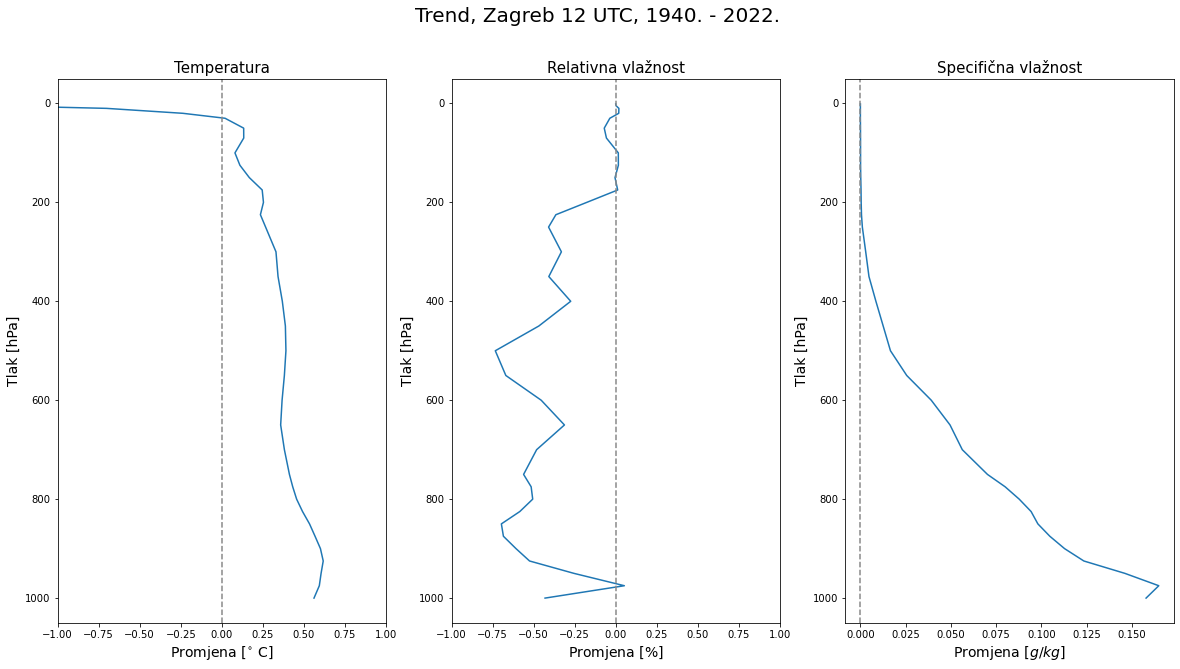

In [18]:
graph_trend(zg_temp_00, zg_rel_00, zg_spec_00, "Trend, Zagreb 12 UTC, 1940. - 2022.")

plt.savefig("zg_12.png")

## Zadar 12 UTC

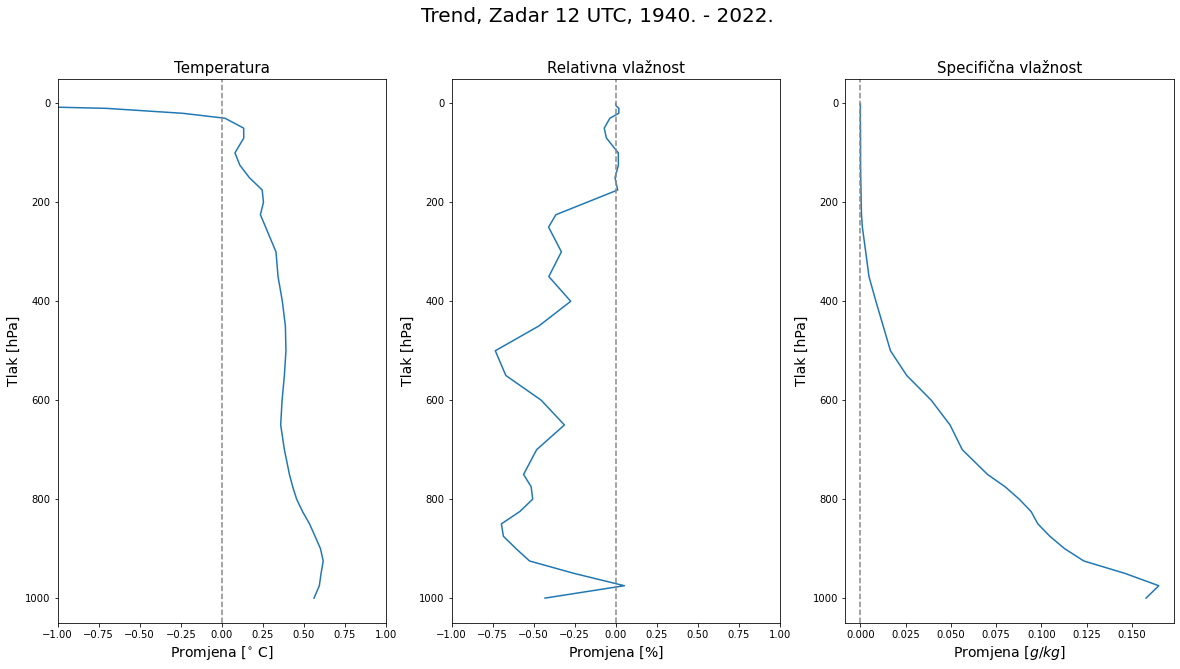

In [19]:
graph_trend(zg_temp_00, zg_rel_00, zg_spec_00, "Trend, Zadar 12 UTC, 1940. - 2022.")

plt.savefig("zd_12.png")

In [21]:
climatology_by_level = []

for level in range(len(levels)):
    level_total = []
    for time_step in range(len(zg_temp_12)):
        level_total.append(zg_temp_12[time_step][level][0][0])
    
    climatology_by_level.append(np.mean(level_total))

In [32]:
anomalies_by_level = []
for level in range(len(levels)):
    
    yearly_averages = []
    sum = 0
    counter = 0

    for time_step in range(len(zg_temp_12)):
        sum += zg_temp_12[time_step][level][0][0]
        if (time_step < 12 and counter == 5 or time_step > 12 and counter == 6):
            yearly_averages.append(sum/12 - climatology_by_level[level])
            sum = 0
            counter = 0
        counter += 1

    anomalies_by_level.append(yearly_averages)

-0.5782129668851658 -7.786962829366666
-1.6992688720396292 -7.786962829366666
-1.812715718641859 -7.786962829366666
-2.290733222518431 -7.786962829366666
-3.877736303391645 -7.786962829366666
-1.8981475681292324 -7.786962829366666
-4.124135787177084 -7.786962829366666
-1.2407482336574798 -7.786962829366666
-3.407109531362233 -7.786962829366666
-1.2857189579477601 -7.786962829366666
1.3853416382681776 -7.786962829366666
-0.7398069343906144 -7.786962829366666
-0.49641385000062616 -7.786962829366666
-1.0996979953542858 -7.786962829366666
-2.017401410815429 -7.786962829366666
-0.4916537176245015 -7.786962829366666
-2.4316581941801587 -7.786962829366666
0.023818512053717694 -7.786962829366666
-2.2576628291684813 -7.786962829366666
-0.8983945025006032 -7.786962829366666
-1.4798822522372415 -7.786962829366666
-0.9716754877647039 -7.786962829366666
-0.45682959129387274 -7.786962829366666
-0.8548017112665794 -7.786962829366666
-1.6858206108255775 -7.786962829366666
-1.8804849716809713 -7.786962

In [35]:
anomalies_by_level[-1]

[-9.62323970783272,
 -6.660978900758566,
 -10.800871404358816,
 -5.075559555648535,
 -11.42732987838573,
 -3.8657343322628375,
 -9.316586969496816,
 -4.224748526736164,
 -9.96271230623563,
 -4.661052239000853,
 -9.59868744610321,
 -4.198943598591892,
 -9.309070971008188,
 -3.9375121178292005,
 -10.38248082182535,
 -3.6512778420540624,
 -9.002167699389323,
 -4.831790671334129,
 -9.402770418833049,
 -4.040230763840409,
 -9.058161888129575,
 -3.358780234205062,
 -9.02697049440178,
 -3.829281739593,
 -9.190819261453816,
 -3.800971478619175,
 -9.715310689318377,
 -4.33197677184055,
 -10.745754082108899,
 -4.252181921219636,
 -9.702533491887712,
 -4.873629729587478,
 -10.217504655000024,
 -4.579879455323702,
 -9.62048384172023,
 -4.617960514332742,
 -9.711552690074063,
 -4.25694205359577,
 -9.234787852612277,
 -5.06791829051844,
 -9.621110174927608,
 -4.513613401982322,
 -8.947801976988265,
 -4.272850917063366,
 -10.287152907661286,
 -5.0599012254639035,
 -11.271498176388235,
 -3.97258677744

TypeError: Input z must be 2D, not 1D

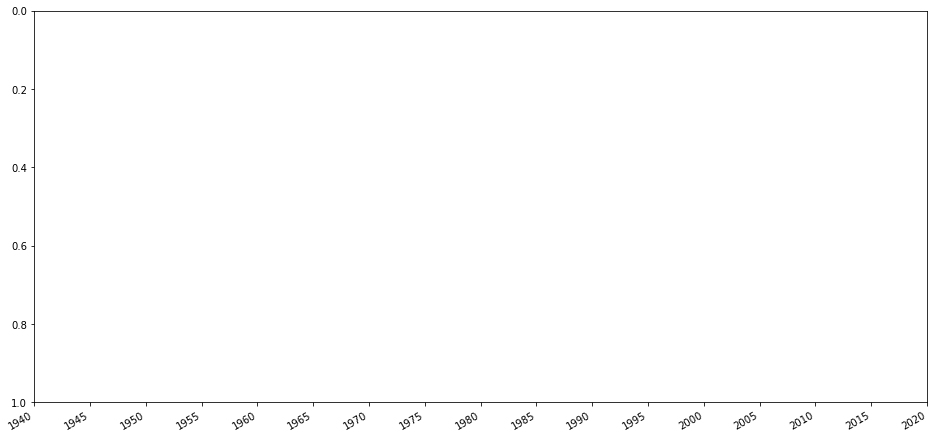

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

date_list = []

for year in range(1940, 2023):
    date = datetime.date(year, 1, 1)
    date_list.append(date)
        
x_values = np.arange(len(date_list))
[X, Y] = np.meshgrid(x_values[1:], levels)
        
plt.gcf().autofmt_xdate()
ax.invert_yaxis()

tick_indices = np.arange(0, len(date_list), 5)  # 12 months in a year
ax.set_xticks(tick_indices)
ax.set_xticklabels([date_list[i].strftime("%Y") for i in tick_indices])

contour = ax.contourf(X, Y, differences_by_level, cmap='bwr')
fig.colorbar(contour, spacing="proportional")